<a href="https://www.kaggle.com/code/swish9/profile-suggestion-testing?scriptVersionId=185351973" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.3 MB/s eta 0:00:00:00:01


In [2]:
!pip install networkx

In [22]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from transformers import GPT2LMHeadModel, GPT2Tokenizer, BertForMaskedLM, BertTokenizer, XLNetLMHeadModel, XLNetTokenizer,T5ForConditionalGeneration, T5Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stopwords
import string
import matplotlib.pyplot as plt
import networkx as nx
import keras
import keras_nlp
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from transformers import BertTokenizer, BertModel
import torch
from sklearn.cluster import KMeans

In [ ]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [ ]:
profiles = [
    {
        "name": "Alice Johnson",
        "bio": "Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp."
    },
    {
        "name": "Bob Smith",
        "bio": "Project Manager with a strong background in finance and operations. Over 8 years of experience in managing cross-functional teams and driving project success. Adept at agile methodologies and risk management. Certified PMP."
    },
    {
        "name": "Carol Martinez",
        "bio": "Data Scientist with expertise in machine learning, data analysis, and visualization. Proficient in Python, R, and SQL. Passionate about uncovering insights from data and helping businesses make data-driven decisions. Published several papers on predictive analytics."
    },
    {
        "name": "David Lee",
        "bio": "Marketing Specialist with over 7 years of experience in digital marketing, SEO, and content strategy. Proven track record in increasing brand awareness and driving online engagement. Skilled in social media management and email marketing campaigns."
    },
    {
        "name": "Eve Kim",
        "bio": "Human Resources Manager with a focus on talent acquisition, employee engagement, and organizational development. Experienced in implementing HR strategies that align with business goals. Strong interpersonal skills and a passion for fostering a positive work environment."
    },
    {
        "name": "Frank Thompson",
        "bio": "Graphic Designer with a keen eye for detail and a passion for creativity. Over 6 years of experience in designing logos, websites, and marketing materials. Proficient in Adobe Creative Suite and web design tools. Strong portfolio showcasing diverse design projects."
    },
    {
        "name": "Grace Chen",
        "bio": "Product Manager with a background in software development and UX design. Skilled in product lifecycle management, market research, and user-centered design. Led the development of several successful products from concept to launch. Excellent problem-solving skills."
    },
    {
        "name": "Henry Davis",
        "bio": "Financial Analyst with expertise in financial modeling, forecasting, and data analysis. Over 5 years of experience in the banking and finance sector. Strong analytical skills and proficiency in Excel, Python, and financial software. MBA in Finance."
    },
    {
        "name": "Ivy Patel",
        "bio": "Content Writer and Editor with a passion for storytelling and communication. Over 8 years of experience in creating engaging content for blogs, websites, and social media. Skilled in SEO, copywriting, and content strategy. Strong portfolio of published work."
    },
    {
        "name": "Jack Wilson",
        "bio": "Cybersecurity Specialist with expertise in network security, threat analysis, and incident response. Over 7 years of experience in protecting organizational assets and ensuring compliance with security standards. Certified CISSP and CEH."
    }
]

In [ ]:
bios = [profile['bio'] for profile in profiles]

In [ ]:
embeddings = model.encode(bios)

embeddings.shape

In [ ]:
similarity_matrix = cosine_similarity(embeddings)
similarity_matrix

In [ ]:
def find_top_matches(similarity_matrix, profile_index, top_n=3):
    similarity_scores = similarity_matrix[profile_index]
    top_indices = np.argsort(-similarity_scores)[1:top_n+1]
    
    return top_indices

In [ ]:
profile_index = 0
top_matches = find_top_matches(similarity_matrix, profile_index)

print(profiles[profile_index]['bio'],'\n')
for match_index in top_matches:
    print(f"Matched Profile: {profiles[match_index]['name']}")
    print(f"Bio: {profiles[match_index]['bio']}\n")

# With interests 

In [ ]:
profiles = [
    {
        "name": "Alice Johnson",
        "bio": "Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp.",
        "interests": {
            "reads_books": 80, 
            "plays_sports": 20,
            "travels": 50
        }
    },
    {
        "name": "Bob Smith",
        "bio": "Project Manager with a strong background in finance and operations. Over 8 years of experience in managing cross-functional teams and driving project success. Adept at agile methodologies and risk management. Certified PMP.",
        "interests": {
            "reads_books": 60,
            "plays_sports": 70,
            "travels": 30
        }
    },
    {
        "name": "Carol Martinez",
        "bio": "Data Scientist with expertise in machine learning, data analysis, and visualization. Proficient in Python, R, and SQL. Passionate about uncovering insights from data and helping businesses make data-driven decisions. Published several papers on predictive analytics.",
        "interests": {
            "reads_books": 90,
            "plays_sports": 40,
            "travels": 60
        }
    },
    {
        "name": "David Lee",
        "bio": "Marketing Specialist with over 7 years of experience in digital marketing, SEO, and content strategy. Proven track record in increasing brand awareness and driving online engagement. Skilled in social media management and email marketing campaigns.",
        "interests": {
            "reads_books": 30,
            "plays_sports": 80,
            "travels": 40
        }
    },
    {
        "name": "Eve Kim",
        "bio": "Human Resources Manager with a focus on talent acquisition, employee engagement, and organizational development. Experienced in implementing HR strategies that align with business goals. Strong interpersonal skills and a passion for fostering a positive work environment.",
        "interests": {
            "reads_books": 50,
            "plays_sports": 60,
            "travels": 70
        }
    },
    {
        "name": "Frank Thompson",
        "bio": "Graphic Designer with a keen eye for detail and a passion for creativity. Over 6 years of experience in designing logos, websites, and marketing materials. Proficient in Adobe Creative Suite and web design tools. Strong portfolio showcasing diverse design projects.",
        "interests": {
            "reads_books": 70,
            "plays_sports": 20,
            "travels": 90
        }
    },
    {
        "name": "Grace Chen",
        "bio": "Product Manager with a background in software development and UX design. Skilled in product lifecycle management, market research, and user-centered design. Led the development of several successful products from concept to launch. Excellent problem-solving skills.",
        "interests": {
            "reads_books": 80,
            "plays_sports": 50,
            "travels": 40
        }
    },
    {
        "name": "Henry Davis",
        "bio": "Financial Analyst with expertise in financial modeling, forecasting, and data analysis. Over 5 years of experience in the banking and finance sector. Strong analytical skills and proficiency in Excel, Python, and financial software. MBA in Finance.",
        "interests": {
            "reads_books": 40,
            "plays_sports": 60,
            "travels": 80
        }
    },
    {
        "name": "Ivy Patel",
        "bio": "Content Writer and Editor with a passion for storytelling and communication. Over 8 years of experience in creating engaging content for blogs, websites, and social media. Skilled in SEO, copywriting, and content strategy. Strong portfolio of published work.",
        "interests": {
            "reads_books": 90,
            "plays_sports": 10,
            "travels": 70
        }
    },
    {
        "name": "Jack Wilson",
        "bio": "Cybersecurity Specialist with expertise in network security, threat analysis, and incident response. Over 7 years of experience in protecting organizational assets and ensuring compliance with security standards. Certified CISSP and CEH.",
        "interests": {
            "reads_books": 60,
            "plays_sports": 90,
            "travels": 30
        }
    }
]

In [ ]:
def calculate_combined_similarity(embeddings, profiles, weight_bio=0.7, weight_interests=0.3):
    bio_similarity = cosine_similarity(embeddings)
    interest_vectors = np.array([[profile['interests']['reads_books'],
                                  profile['interests']['plays_sports'],
                                  profile['interests']['travels']] for profile in profiles])
    interest_vectors = interest_vectors / 100.0 
    interest_similarity = cosine_similarity(interest_vectors)
    combined_similarity = (weight_bio * bio_similarity) + (weight_interests * interest_similarity)
    return combined_similarity

In [ ]:
combined_similarity_matrix = calculate_combined_similarity(embeddings, profiles)

In [ ]:
def find_top_matches(combined_similarity_matrix, profile_index, top_n=3):
    similarity_scores = combined_similarity_matrix[profile_index]
    top_indices = np.argsort(-similarity_scores)[1:top_n+1] 
    
    return top_indices

In [ ]:
profile_index = 3
top_matches = find_top_matches(similarity_matrix, profile_index)

print(profiles[profile_index]['bio'],'\n')

for match_index in top_matches:
    print(f"Matched Profile: {profiles[match_index]['name']}")
    print(f"Bio: {profiles[match_index]['bio']}\n")

In [ ]:
bios = [profile['bio'] for profile in profiles]
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeddings = model.encode(bios)

In [ ]:
def calculate_combined_similarity(embeddings, profiles, user_weights):
    bio_similarity = cosine_similarity(embeddings)
    interest_vectors = np.array([[profile['interests']['reads_books'],
                                  profile['interests']['plays_sports'],
                                  profile['interests']['travels']] for profile in profiles])
    interest_vectors = interest_vectors / 100.0 
    interest_similarity = cosine_similarity(interest_vectors)
    combined_similarity = (user_weights['bio'] * bio_similarity) + \
                          (user_weights['reads_books'] * interest_similarity) + \
                          (user_weights['plays_sports'] * interest_similarity) + \
                          (user_weights['travels'] * interest_similarity)
    
    return combined_similarity

In [ ]:
user_weights = {
    "bio": 0.5,  # 50%
    "reads_books": 0.2,  
    "plays_sports": 0.2, 
    "travels": 0.1  
}

combined_similarity_matrix = calculate_combined_similarity(embeddings, profiles, user_weights)

In [ ]:
def find_top_matches(combined_similarity_matrix, profile_index, top_n=3):
    similarity_scores = combined_similarity_matrix[profile_index]
    
    top_indices = np.argsort(-similarity_scores)[1:top_n+1]  
    
    return top_indices

In [ ]:
profile_index = 8
top_matches = find_top_matches(combined_similarity_matrix, profile_index)

for match_index in top_matches:
    print(f"Matched Profile: {profiles[match_index]['name']}")
    print(f"Bio: {profiles[match_index]['bio']}")
    print(f"Interests: {profiles[match_index]['interests']}\n")

# BOG 

In [ ]:
category_keywords = {
    "software": ["software", "engineer", "programming", "coding", "development", "python", "java", "cloud", "data", "technology"],
    "reads_books": ["book", "reading", "literature", "novel", "author", "library", "story", "fiction", "non-fiction", "biography"],
    "plays_sports": ["sports", "soccer", "basketball", "tennis", "baseball", "football", "cricket", "running", "athlete", "fitness"],
    "travels": ["travel", "trip", "vacation", "tourism", "destination", "explore", "journey", "adventure", "flight", "holiday"]
}

In [ ]:
def calculate_category_scores(profiles, category_keywords):
    category_scores = {category: [] for category in category_keywords}
    for profile in profiles:
        bio = profile['bio'].lower()
        for category, keywords in category_keywords.items():
            score = sum(bio.count(word) for word in keywords)
            category_scores[category].append(score)
    return category_scores

In [ ]:
category_scores = calculate_category_scores(profiles, category_keywords)

def calculate_probability_scores(category_scores):
    probability_scores = {}
    for category, scores in category_scores.items():
        total = sum(scores)
        if total > 0:
            probability_scores[category] = [score / total for score in scores]
        else:
            probability_scores[category] = [0 for _ in scores]
    return probability_scores

In [ ]:
probability_scores = calculate_probability_scores(category_scores)

In [ ]:
def calculate_combined_similarity(profiles, probability_scores, user_weights):
    num_profiles = len(profiles)
    combined_similarity = np.zeros((num_profiles, num_profiles))
    
    bios = [profile['bio'] for profile in profiles]
    vectorizer = CountVectorizer()
    bio_bow_matrix = vectorizer.fit_transform(bios)
    bio_similarity = cosine_similarity(bio_bow_matrix)
    
    for i in range(num_profiles):
        for j in range(num_profiles):
            interest_similarity = 0
            for category in category_keywords:
                interest_similarity += user_weights[category] * probability_scores[category][i] * probability_scores[category][j]
            
            combined_similarity[i][j] = user_weights['bio'] * bio_similarity[i][j] + interest_similarity
    return combined_similarity

In [ ]:
user_weights = {
    "bio": 0.5,  
    "software": 0.2,  
    "reads_books": 0.1,  
    "plays_sports": 0.1,  
    "travels": 0.1   
}

In [ ]:
combined_similarity_matrix = calculate_combined_similarity(profiles, probability_scores, user_weights)

def find_top_matches(combined_similarity_matrix, profile_index, top_n=3):
    similarity_scores = combined_similarity_matrix[profile_index]
    top_indices = np.argsort(-similarity_scores)[1:top_n+1] 
    
    return top_indices

In [ ]:
profile_index = 0 
top_matches = find_top_matches(combined_similarity_matrix, profile_index)

for match_index in top_matches:
    print(f"Matched Profile: {profiles[match_index]['name']}")
    print(f"Bio: {profiles[match_index]['bio']}")
    print(f"Interests: {profiles[match_index]['interests']}\n")


# RE

In [ ]:
experience_pattern = r"\b\d+\b\s*(years|months)"
field_pattern = r"(software|engineering|finance|data science|marketing|human resources|graphic design|product management|financial analysis|content writing|cybersecurity)"
domain_pattern = r"(tech|finance|data|marketing|human resources|design|product management|finance)"
skillset_pattern = r"(python|java|cloud|data analysis|machine learning|digital marketing|design|product lifecycle|financial modeling|content writing|network security)"

In [ ]:
def calculate_regex_scores(profiles, regex_patterns):
    scores = np.zeros((len(profiles), len(regex_patterns)))
    for i, profile in enumerate(profiles):
        bio = profile['bio'].lower()
        for j, pattern in enumerate(regex_patterns):
            matches = re.findall(pattern, bio)
            scores[i][j] = len(matches)
    return scores

In [ ]:
regex_patterns = [experience_pattern, field_pattern, domain_pattern, skillset_pattern]
regex_scores = calculate_regex_scores(profiles, regex_patterns)

In [ ]:
def calculate_combined_similarity(regex_scores, user_weights):
    num_profiles = regex_scores.shape[0]
    combined_similarity = np.zeros((num_profiles, num_profiles))
    
    for i in range(num_profiles):
        for j in range(num_profiles):
            weighted_sum = 0
            for k, param in enumerate(user_weights):  # Iterate over dictionary keys
                weighted_sum += user_weights[param] * regex_scores[i][k] * regex_scores[j][k]
            combined_similarity[i][j] = weighted_sum
    return combined_similarity

In [ ]:
user_weights = {
    "experience": 0.4,
    "field": 0.3,
    "domain": 0.2,
    "skillset": 0.1
}

In [ ]:
combined_similarity_matrix = calculate_combined_similarity(regex_scores, user_weights)
def find_top_matches(combined_similarity_matrix, profile_index, top_n=3):
    similarity_scores = combined_similarity_matrix[profile_index]
    top_indices = np.argsort(-similarity_scores)[1:top_n+1]
    
    return top_indices

In [ ]:
profile_index = 5
top_matches = find_top_matches(combined_similarity_matrix, profile_index)

for match_index in top_matches:
    print(f"Matched Profile: {profiles[match_index]['name']}")
    print(f"Bio: {profiles[match_index]['bio']}")
    print(f"Interests: {profiles[match_index]['interests']}\n")

# Bio Generations

In [ ]:
model_name = 'gpt2-medium'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

In [ ]:
def generate_bio_suggestions(input_bio, num_suggestions=3):
    prompt = f"Based on the following input bio: {input_bio}, generate professional bio suggestions that highlight key skills, experiences, and achievements. Each suggestion should be concise, engaging, and suitable for a LinkedIn profile or professional resume.\n\nSuggestions:"
    
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(
        inputs,
        max_length=150,
        num_return_sequences=num_suggestions,
        no_repeat_ngram_size=2,
        temperature=0.7,
        do_sample=True 
    )

    suggestions = [tokenizer.decode(output, skip_special_tokens=True).replace(prompt, '').strip() for output in outputs]
    return suggestions

In [ ]:
user_input_bio = "Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp."
suggestions = generate_bio_suggestions(user_input_bio)

for i, suggestion in enumerate(suggestions):
    print(f"Suggestion {i+1}: {suggestion}")

In [ ]:
model_name = 'distilgpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

In [ ]:
def generate_bio_suggestions(input_bio, num_suggestions=3):
    prompt = f"Based on the following input bio: {input_bio}, generate professional bio suggestions that highlight key skills, experiences, and achievements. Each suggestion should be concise, engaging, and suitable for a LinkedIn profile or professional resume.\n\nSuggestions:"
    
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(
        inputs,
        max_length=150,
        num_return_sequences=num_suggestions,
        no_repeat_ngram_size=2,
        temperature=0.7,
        do_sample=True 
    )

    suggestions = [tokenizer.decode(output, skip_special_tokens=True).replace(prompt, '').strip() for output in outputs]
    return suggestions

In [ ]:
user_input_bio = "Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp."
suggestions = generate_bio_suggestions(user_input_bio)

for i, suggestion in enumerate(suggestions):
    print(f"Suggestion {i+1}: {suggestion}")

In [ ]:
model_name = 'bert-base-uncased'
model = BertForMaskedLM.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

In [ ]:
def generate_bio_suggestions(input_bio, num_suggestions=3):
    prompt = f"Based on the following input bio: {input_bio}, generate professional bio suggestions that highlight key skills, experiences, and achievements. Each suggestion should be concise, engaging, and suitable for a LinkedIn profile or professional resume.\n\nSuggestions:"
    
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(
        inputs,
        max_length=150,
        num_return_sequences=num_suggestions,
        no_repeat_ngram_size=2,
        temperature=0.7,
        do_sample=True 
    )

    suggestions = [tokenizer.decode(output, skip_special_tokens=True).replace(prompt, '').strip() for output in outputs]
    return suggestions

In [ ]:
user_input_bio = "Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp."
suggestions = generate_bio_suggestions(user_input_bio)

for i, suggestion in enumerate(suggestions):
    print(f"Suggestion {i+1}: {suggestion}")

In [ ]:
model_name = 'xlnet-base-cased'
model = XLNetLMHeadModel.from_pretrained(model_name)
tokenizer = XLNetTokenizer.from_pretrained(model_name)

In [ ]:
def generate_bio_suggestions(input_bio, num_suggestions=3):
    prompt = f"Based on the following input bio: {input_bio}, generate professional bio suggestions that highlight key skills, experiences, and achievements. Each suggestion should be concise, engaging, and suitable for a LinkedIn profile or professional resume.\n\nSuggestions:"
    
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(
        inputs,
        max_length=150,
        num_return_sequences=num_suggestions,
        no_repeat_ngram_size=2,
        temperature=0.7,
        do_sample=True 
    )

    suggestions = [tokenizer.decode(output, skip_special_tokens=True).replace(prompt, '').strip() for output in outputs]
    return suggestions

In [ ]:
user_input_bio = "Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp."
suggestions = generate_bio_suggestions(user_input_bio)

for i, suggestion in enumerate(suggestions):
    print(f"Suggestion {i+1}: {suggestion}")

In [ ]:
model_name = 't5-small'
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

In [ ]:
def generate_bio_suggestions(input_bio, num_suggestions=3):
    prompt = f"Based on the following input bio: {input_bio}, generate professional bio suggestions that highlight key skills, experiences, and achievements. Each suggestion should be concise, engaging, and suitable for a LinkedIn profile or professional resume.\n\nSuggestions:"
    
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(
        inputs,
        max_length=150,
        num_return_sequences=num_suggestions,
        no_repeat_ngram_size=2,
        temperature=0.7,
        do_sample=True 
    )

    suggestions = [tokenizer.decode(output, skip_special_tokens=True).replace(prompt, '').strip() for output in outputs]
    return suggestions

In [ ]:
user_input_bio = "Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp."
suggestions = generate_bio_suggestions(user_input_bio)

for i, suggestion in enumerate(suggestions):
    print(f"Suggestion {i+1}: {suggestion}")

# Ngram

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(3, 3))
X = vectorizer.fit_transform(bios)

In [ ]:
similarity_matrix = cosine_similarity(X)

In [ ]:
def find_top_matches(similarity_matrix, profile_index, top_n=3):
    similarity_scores = similarity_matrix[profile_index]
    top_indices = np.argsort(-similarity_scores)[1:top_n+1]
    return top_indices

In [ ]:
profile_index = 0
top_matches = find_top_matches(similarity_matrix, profile_index)

print("Original Bio:\n", bios[profile_index], '\n\n')
for match_index in top_matches:
    print(f"Matched Profile: {profiles[match_index]['name']}")
    print(f"Bio: {bios[match_index]}\n")

# Clustering Profiles 

In [4]:
profiles = [
    {
        "name": "Alice Johnson",
        "bio": "Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp.",
        "interests": {
            "reads_books": 80, 
            "plays_sports": 20,
            "travels": 50
        },
        "location": "Bangalore"
    },
    {
        "name": "Bob Smith",
        "bio": "Project Manager with a strong background in finance and operations. Over 8 years of experience in managing cross-functional teams and driving project success. Adept at agile methodologies and risk management. Certified PMP.",
        "interests": {
            "reads_books": 60,
            "plays_sports": 70,
            "travels": 30
        },
        "location": "Mumbai"
    },
    {
        "name": "Carol Martinez",
        "bio": "Data Scientist with expertise in machine learning, data analysis, and visualization. Proficient in Python, R, and SQL. Passionate about uncovering insights from data and helping businesses make data-driven decisions. Published several papers on predictive analytics.",
        "interests": {
            "reads_books": 90,
            "plays_sports": 40,
            "travels": 60
        },
        "location": "Delhi"
    },
    {
        "name": "David Lee",
        "bio": "Marketing Specialist with over 7 years of experience in digital marketing, SEO, and content strategy. Proven track record in increasing brand awareness and driving online engagement. Skilled in social media management and email marketing campaigns.",
        "interests": {
            "reads_books": 30,
            "plays_sports": 80,
            "travels": 40
        },
        "location": "Hyderabad"
    },
    {
        "name": "Eve Kim",
        "bio": "Human Resources Manager with a focus on talent acquisition, employee engagement, and organizational development. Experienced in implementing HR strategies that align with business goals. Strong interpersonal skills and a passion for fostering a positive work environment.",
        "interests": {
            "reads_books": 50,
            "plays_sports": 60,
            "travels": 70
        },
        "location": "Chennai"
    },
    {
        "name": "Frank Thompson",
        "bio": "Graphic Designer with a keen eye for detail and a passion for creativity. Over 6 years of experience in designing logos, websites, and marketing materials. Proficient in Adobe Creative Suite and web design tools. Strong portfolio showcasing diverse design projects.",
        "interests": {
            "reads_books": 70,
            "plays_sports": 20,
            "travels": 90
        },
        "location": "Pune"
    },
    {
        "name": "Grace Chen",
        "bio": "Product Manager with a background in software development and UX design. Skilled in product lifecycle management, market research, and user-centered design. Led the development of several successful products from concept to launch. Excellent problem-solving skills.",
        "interests": {
            "reads_books": 80,
            "plays_sports": 50,
            "travels": 40
        },
        "location": "Kolkata"
    },
    {
        "name": "Henry Davis",
        "bio": "Financial Analyst with expertise in financial modeling, forecasting, and data analysis. Over 5 years of experience in the banking and finance sector. Strong analytical skills and proficiency in Excel, Python, and financial software. MBA in Finance.",
        "interests": {
            "reads_books": 40,
            "plays_sports": 60,
            "travels": 80
        },
        "location": "Indore"
    },
    {
        "name": "Ivy Patel",
        "bio": "Content Writer and Editor with a passion for storytelling and communication. Over 8 years of experience in creating engaging content for blogs, websites, and social media. Skilled in SEO, copywriting, and content strategy. Strong portfolio of published work.",
        "interests": {
            "reads_books": 90,
            "plays_sports": 10,
            "travels": 70
        },
        "location": "Noida"
    },
    {
        "name": "Jack Wilson",
        "bio": "Cybersecurity Specialist with expertise in network security, threat analysis, and incident response. Over 7 years of experience in protecting organizational assets and ensuring compliance with security standards. Certified CISSP and CEH.",
        "interests": {
            "reads_books": 60,
            "plays_sports": 90,
            "travels": 30
        },
        "location": "Nagpur"
    },
    {
        "name": "Karen White",
        "bio": "UX Designer with a passion for creating intuitive and user-friendly interfaces. Over 5 years of experience in wireframing, prototyping, and user testing. Skilled in Sketch, Figma, and Adobe XD. Dedicated to improving user experience through innovative design solutions.",
        "interests": {
            "reads_books": 40,
            "plays_sports": 50,
            "travels": 80
        },
        "location": "Bangalore"
    },
    {
        "name": "Larry Brown",
        "bio": "Operations Manager with a strong background in supply chain management and logistics. Over 10 years of experience in optimizing operations and reducing costs. Skilled in Lean Six Sigma and project management. Proven track record in improving efficiency and productivity.",
        "interests": {
            "reads_books": 50,
            "plays_sports": 60,
            "travels": 70
        },
        "location": "Mumbai"
    },
    {
        "name": "Nancy Green",
        "bio": "Digital Marketing Expert with over 8 years of experience in SEO, SEM, and social media marketing. Proven ability to drive traffic and increase sales through innovative digital marketing strategies. Certified Google Analytics and AdWords specialist.",
        "interests": {
            "reads_books": 60,
            "plays_sports": 40,
            "travels": 80
        },
        "location": "Delhi"
    },
    {
        "name": "Oscar Harris",
        "bio": "Mobile App Developer with expertise in iOS and Android development. Over 6 years of experience in building user-friendly and high-performance mobile applications. Proficient in Swift, Kotlin, and Flutter. Strong portfolio of published apps.",
        "interests": {
            "reads_books": 70,
            "plays_sports": 60,
            "travels": 50
        },
        "location": "Hyderabad"
    },
    {
        "name": "Paula Adams",
        "bio": "Sales Manager with a proven track record of exceeding sales targets and driving revenue growth. Over 9 years of experience in B2B and B2C sales. Skilled in customer relationship management and strategic planning. Strong leadership and team-building skills.",
        "interests": {
            "reads_books": 40,
            "plays_sports": 70,
            "travels": 60
        },
        "location": "Chennai"
    },
    {
        "name": "Quincy Hall",
        "bio": "Business Analyst with expertise in data analysis, process improvement, and project management. Over 5 years of experience in identifying business needs and implementing effective solutions. Proficient in SQL, Excel, and business intelligence tools.",
        "interests": {
            "reads_books": 50,
            "plays_sports": 50,
            "travels": 70
        },
        "location": "Pune"
    },
    {
        "name": "Rachel King",
        "bio": "Content Strategist with a background in journalism and digital media. Over 7 years of experience in creating and managing content strategies for various brands. Skilled in SEO, copywriting, and social media marketing. Strong portfolio of successful campaigns.",
        "interests": {
            "reads_books": 80,
            "plays_sports": 30,
            "travels": 70
        },
        "location": "Kolkata"
    },
    {
        "name": "Steven Walker",
        "bio": "Software Developer with expertise in full-stack development and DevOps. Over 6 years of experience in building and deploying scalable web applications. Proficient in JavaScript, Python, and Docker. Passionate about open-source contributions and continuous learning.",
        "interests": {
            "reads_books": 60,
            "plays_sports": 40,
            "travels": 80
        },
        "location": "Indore"
    },
    {
        "name": "Tina Scott",
        "bio": "Human Resources Specialist with a focus on employee relations and performance management. Over 5 years of experience in HR roles, ensuring compliance with labor laws and promoting a positive work environment. Skilled in conflict resolution and employee engagement.",
        "interests": {
            "reads_books": 50,
            "plays_sports": 70,
            "travels": 60
        },
        "location": "Noida"
    },
    {
        "name": "Liam Patel",
        "bio": "AI Researcher specializing in natural language processing and deep learning. PhD in Computer Science with a focus on neural networks and text generation models. Experienced in Python, TensorFlow, and PyTorch. Published several papers in top AI conferences.",
        "interests": {
            "reads_books": 80,
            "plays_sports": 30,
            "travels": 40
        },
        "location": "Bangalore"
    },
    {
        "name": "Sophia Gupta",
        "bio": "UX/UI Designer with a passion for creating intuitive and visually appealing user interfaces. Skilled in wireframing, prototyping, and user research. Proficient in Sketch, Figma, and Adobe XD. Strong advocate for user-centered design principles.",
        "interests": {
            "reads_books": 60,
            "plays_sports": 20,
            "travels": 70
        },
        "location": "Mumbai"
    },
    {
        "name": "Noah Kumar",
        "bio": "Blockchain Developer specializing in decentralized applications (dApps) and smart contracts. Experienced in Ethereum and Solidity. Strong background in cryptography and secure coding practices. Contributed to open-source blockchain projects.",
        "interests": {
            "reads_books": 70,
            "plays_sports": 40,
            "travels": 50
        },
        "location": "Delhi"
    },
    {
        "name": "Olivia Sharma",
        "bio": "Environmental Scientist with expertise in climate change research and environmental policy. PhD in Environmental Science with a focus on sustainable development. Skilled in GIS, data analysis, and environmental impact assessments.",
        "interests": {
            "reads_books": 50,
            "plays_sports": 60,
            "travels": 30
        },
        "location": "Hyderabad"
    },
    {
        "name": "William Reddy",
        "bio": "Architect with a passion for sustainable design and urban planning. Over 10 years of experience in designing eco-friendly buildings and public spaces. Skilled in AutoCAD, Revit, and 3D modeling software.",
        "interests": {
            "reads_books": 40,
            "plays_sports": 30,
            "travels": 80
        },
        "location": "Chennai"
    },
    {
        "name": "Emma Verma",
        "bio": "Healthcare Administrator with a background in hospital management and healthcare policy. Experienced in optimizing healthcare operations and ensuring compliance with regulatory standards. Strong interpersonal and leadership skills.",
        "interests": {
            "reads_books": 70,
            "plays_sports": 20,
            "travels": 40
        },
        "location": "Pune"
    },
    {
        "name": "Alexander Singh",
        "bio": "Civil Engineer specializing in infrastructure development and project management. Experienced in structural design, construction supervision, and budget management. Skilled in CAD software and civil engineering principles.",
        "interests": {
            "reads_books": 30,
            "plays_sports": 50,
            "travels": 60
        },
        "location": "Kolkata"
    },
    {
        "name": "Mia Chopra",
        "bio": "Digital Marketer with a focus on content strategy and social media management. Over 5 years of experience in developing and executing digital marketing campaigns. Skilled in SEO, SEM, and email marketing.",
        "interests": {
            "reads_books": 60,
            "plays_sports": 40,
            "travels": 70
        },
        "location": "Nagpur"
    },
    {
        "name": "Ethan Rao",
        "bio": "Software Developer specializing in web application development. Proficient in JavaScript, React, and Node.js. Experienced in building scalable and responsive web solutions. Passionate about open-source development.",
        "interests": {
            "reads_books": 50,
            "plays_sports": 30,
            "travels": 50
        },
        "location": "Indore"
    },
    {
        "name": "Ava Mishra",
        "bio": "Financial Analyst with expertise in financial modeling and investment analysis. MBA in Finance with a strong background in quantitative analysis and risk management. Skilled in Excel, SQL, and financial software.",
        "interests": {
            "reads_books": 40,
            "plays_sports": 60,
            "travels": 40
        },
        "location": "Jaipur"
    },
    {
        "name": "James Kumar",
        "bio": "Sales Manager with a proven track record in B2B sales and client relationship management. Experienced in leading sales teams to exceed revenue targets. Skilled in negotiation, strategic planning, and market analysis.",
        "interests": {
            "reads_books": 30,
            "plays_sports": 50,
            "travels": 30
        },
        "location": "Lucknow"
    },
    {
        "name": "Charlotte Joshi",
        "bio": "Human Resources Specialist with a focus on talent acquisition and employee development. Experienced in HR strategy development and implementation. Strong communication and organizational skills.",
        "interests": {
            "reads_books": 50,
            "plays_sports": 40,
            "travels": 60
        },
        "location": "Ahmedabad"
    },
    {
        "name": "Michael Mittal",
        "bio": "Mechanical Engineer with expertise in product design and manufacturing processes. Experienced in CAD/CAM software and prototyping. Strong analytical skills and problem-solving abilities.",
        "interests": {
            "reads_books": 40,
            "plays_sports": 30,
            "travels": 50
        },
        "location": "Coimbatore"
    },
    {
        "name": "Isabella Rao",
        "bio": "Content Writer with a passion for creating engaging and informative content. Experienced in writing for various platforms including blogs, websites, and social media. Skilled in SEO and digital content strategy.",
        "interests": {
            "reads_books": 60,
            "plays_sports": 20,
            "travels": 70
        },
        "location": "Visakhapatnam"
    },
    {
        "name": "Lucas Khanna",
        "bio": "Graphic Designer with a creative flair for visual communication. Experienced in designing logos, posters, and branding materials. Proficient in Adobe Creative Suite and digital illustration.",
        "interests": {
            "reads_books": 30,
            "plays_sports": 40,
            "travels": 60
        },
        "location": "Surat"
    }
]

In [5]:
len(profiles)

34

In [ ]:
X = np.array([[profile['interests']['reads_books'], 
               profile['interests']['plays_sports'], 
               profile['interests']['travels']] for profile in profiles])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
eps = 0.5 
min_samples = 2 

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
for profile, cluster_label in zip(profiles, clusters):
    profile['cluster'] = cluster_label

clusters_dict = defaultdict(list)

In [ ]:
for profile in profiles:
    clusters_dict[profile['cluster']].append(profile)

In [ ]:
for cluster, profiles_in_cluster in clusters_dict.items():
    print(f"Cluster {cluster}:")
    for profile in profiles_in_cluster:
        print(f"\t{profile['name']} - {profile['bio']}, Location: {profile['location']}")

In [ ]:
def calculate_cosine_similarity(profile1, profile2):
    vector1 = np.array([profile1['interests']['reads_books'],
                        profile1['interests']['plays_sports'],
                        profile1['interests']['travels']])
    vector2 = np.array([profile2['interests']['reads_books'],
                        profile2['interests']['plays_sports'],
                        profile2['interests']['travels']])
    return cosine_similarity([vector1], [vector2])[0][0]

In [ ]:
def find_most_similar_profiles_by_index(profile_index, profiles, top_n=3):
    input_profile = profiles[profile_index]

    input_cluster = input_profile['cluster']
    input_location = input_profile['location']
    candidates = [profile for profile in profiles
                  if profile['location'] == input_location and profile['cluster'] == input_cluster]
    candidates.sort(key=lambda x: calculate_cosine_similarity(input_profile, x), reverse=True)
    if input_profile in candidates:
        candidates.remove(input_profile)
    return candidates[:top_n]

In [ ]:
input_profile_index = 3
similar_profiles = find_most_similar_profiles_by_index(input_profile_index, profiles)
input_profile = profiles[input_profile_index]
print(profiles[3])
print(f"3 Most Similar Profiles to '{input_profile['name']}' in {input_profile['location']} (Cluster {input_profile['cluster']}):")
for i, profile in enumerate(similar_profiles, start=1):
    print(f"{i}. {profile['name']} - {profile['bio']}")
    print(f"   Interests: Reads books: {profile['interests']['reads_books']}, Plays sports: {profile['interests']['plays_sports']}, Travels: {profile['interests']['travels']}")
    print(f"   Location: {profile['location']}")
    print(f"   Cluster: {profile['cluster']}")
    similarity_score = calculate_cosine_similarity(input_profile, profile)
    print(f"   Cosine Similarity Score: {similarity_score:.2f}")
    print()

In [ ]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
for profile, cluster_label in zip(profiles, clusters):
    profile['cluster'] = cluster_label
for cluster_id in range(n_clusters):
    print(f"Cluster {cluster_id}:")
    for profile in profiles:
        if profile['cluster'] == cluster_id:
            print(f"\t{profile['name']} - {profile['bio']}, Location: {profile['location']}")
            print(f"\tInterests: Reads books: {profile['interests']['reads_books']}, Plays sports: {profile['interests']['plays_sports']}, Travels: {profile['interests']['travels']}")
    print()

In [ ]:
def find_most_similar_profiles_by_index(profile_index, profiles, top_n=3):
    input_profile = profiles[profile_index]

    input_cluster = input_profile['cluster']
    input_location = input_profile['location']
    candidates = [profile for profile in profiles
                  if profile['location'] == input_location and profile['cluster'] == input_cluster]
    candidates.sort(key=lambda x: calculate_cosine_similarity(input_profile, x), reverse=True)
    if input_profile in candidates:
        candidates.remove(input_profile)
    return candidates[:top_n]

In [ ]:
input_profile_index = 3
similar_profiles = find_most_similar_profiles_by_index(input_profile_index, profiles)
input_profile = profiles[input_profile_index]
print(f"3 Most Similar Profiles to '{input_profile['name']}' in {input_profile['location']} (Cluster {input_profile['cluster']}):")
for i, profile in enumerate(similar_profiles, start=1):
    print(f"{i}. {profile['name']} - {profile['bio']}")
    print(f"   Interests: Reads books: {profile['interests']['reads_books']}, Plays sports: {profile['interests']['plays_sports']}, Travels: {profile['interests']['travels']}")
    print(f"   Location: {profile['location']}")
    print(f"   Cluster: {profile['cluster']}")
    similarity_score = calculate_cosine_similarity(input_profile, profile)
    print(f"   Cosine Similarity Score: {similarity_score:.2f}")
    print()

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
for profile, cluster_label in zip(profiles, clusters):
    profile['cluster'] = cluster_label
for cluster_id in range(n_clusters):
    print(f"Cluster {cluster_id}:")
    for profile in profiles:
        if profile['cluster'] == cluster_id:
            print(f"\t{profile['name']} - {profile['bio']}, Location: {profile['location']}")
            print(f"\tInterests: Reads books: {profile['interests']['reads_books']}, Plays sports: {profile['interests']['plays_sports']}, Travels: {profile['interests']['travels']}")
    print()

In [ ]:
def find_most_similar_profiles_by_index(profile_index, profiles, top_n=3):
    input_profile = profiles[profile_index]

    input_cluster = input_profile['cluster']
    input_location = input_profile['location']
    candidates = [profile for profile in profiles
                  if profile['location'] == input_location and profile['cluster'] == input_cluster]
    candidates.sort(key=lambda x: calculate_cosine_similarity(input_profile, x), reverse=True)
    if input_profile in candidates:
        candidates.remove(input_profile)
    return candidates[:top_n]

In [ ]:
input_profile_index = 3
similar_profiles = find_most_similar_profiles_by_index(input_profile_index, profiles)
input_profile = profiles[input_profile_index]
print(f"3 Most Similar Profiles to '{input_profile['name']}' in {input_profile['location']} (Cluster {input_profile['cluster']}):")
for i, profile in enumerate(similar_profiles, start=1):
    print(f"{i}. {profile['name']} - {profile['bio']}")
    print(f"   Interests: Reads books: {profile['interests']['reads_books']}, Plays sports: {profile['interests']['plays_sports']}, Travels: {profile['interests']['travels']}")
    print(f"   Location: {profile['location']}")
    print(f"   Cluster: {profile['cluster']}")
    similarity_score = calculate_cosine_similarity(input_profile, profile)
    print(f"   Cosine Similarity Score: {similarity_score:.2f}")
    print()

In [ ]:
def count_keywords_in_bio(bio, keywords):
    bio_lower = bio.lower()
    counts = {category: sum(bio_lower.count(keyword) for keyword in keywords) for category, keywords in keywords.items()}
    return counts

def visualize_keyword_counts(profiles, keywords):
    categories = list(keywords.keys())
    num_profiles = len(profiles)
    num_categories = len(categories)

    counts_matrix = np.zeros((num_profiles, num_categories))

    for i, profile in enumerate(profiles):
        counts = count_keywords_in_bio(profile['bio'], keywords)
        for j, category in enumerate(categories):
            counts_matrix[i, j] = counts[category]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.2
    x = np.arange(num_profiles)

    for j, category in enumerate(categories):
        ax.bar(x + j * width, counts_matrix[:, j], width, label=category)

    ax.set_xticks(x + width * (num_categories - 1) / 2)
    ax.set_xticklabels([profile['name'] for profile in profiles])
    ax.set_xlabel('Profiles')
    ax.set_ylabel('Keyword Counts')
    ax.set_title('Keyword Counts in Profiles\' Biographies')
    ax.legend()

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage
visualize_keyword_counts(profiles, category_keywords)

In [ ]:
def count_keywords_in_bio(bio, keywords):
    bio_lower = bio.lower()
    counts = {category: sum(bio_lower.count(keyword) for keyword in keywords) for category, keywords in keywords.items()}
    return counts

def visualize_keyword_counts_cluster_wise(profiles, keywords):
    categories = list(keywords.keys())
    num_profiles = len(profiles)
    num_categories = len(categories)
    
    counts_matrix = np.zeros((num_profiles, num_categories))
    
    for i, profile in enumerate(profiles):
        counts = count_keywords_in_bio(profile['bio'], keywords)
        for j, category in enumerate(categories):
            counts_matrix[i, j] = counts[category]
    
    clusters = sorted(set(profile['cluster'] for profile in profiles))
    num_clusters = len(clusters)
    
    fig, axs = plt.subplots(num_clusters, 1, figsize=(10, 6 * num_clusters), sharex=True)
    fig.suptitle('Keyword Counts in Profiles\' Biographies by Cluster', fontsize=16)
    
    for cluster_id, ax in zip(clusters, axs):
        cluster_profiles = [profile for profile in profiles if profile['cluster'] == cluster_id]
        cluster_counts = counts_matrix[[profiles.index(profile) for profile in cluster_profiles]]
        
        ax.bar(categories, cluster_counts.mean(axis=0), color='skyblue')
        ax.set_title(f'Cluster {cluster_id}', fontsize=14)
        ax.set_ylabel('Mean Keyword Counts', fontsize=12)
        ax.tick_params(axis='x', labelrotation=45)
    
    plt.xlabel('Keyword Categories', fontsize=12)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

visualize_keyword_counts_cluster_wise(profiles, category_keywords)

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(text.split())
    return text

def top_words_in_clusters(profiles, num_top_words=10):
    clusters = sorted(set(profile['cluster'] for profile in profiles))
    cluster_texts = {cluster: [] for cluster in clusters}
    
    for profile in profiles:
        cluster_texts[profile['cluster']].append(preprocess_text(profile['bio']))
    
    top_words_per_cluster = {}
    
    for cluster_id, texts in cluster_texts.items():
        all_text = ' '.join(texts)
        words = all_text.split()
        stopwords = set(sklearn_stopwords)
        words = [word for word in words if word not in stopwords]
        
        word_counts = Counter(words)
        top_words = word_counts.most_common(num_top_words)
        
        top_words_per_cluster[cluster_id] = top_words
    
    return top_words_per_cluster

top_words_per_cluster = top_words_in_clusters(profiles)

for cluster_id, top_words in top_words_per_cluster.items():
    print(f"Cluster {cluster_id}:")
    for i, (word, count) in enumerate(top_words, 1):
        print(f"{i}. {word}: {count}")
    print()

### 1. Graph-Based Recommendations

Graph-based recommendation systems model relationships between entities (in this case, user profiles) using graph structures. Nodes represent profiles, and edges signify relationships or similarities between profiles based on various criteria such as shared interests, connections, or geographic proximity. Techniques such as Personalized PageRank can prioritize recommendations based on the importance of nodes (profiles) within the graph, while algorithms like Node2Vec can capture nuanced similarities between profiles by learning embeddings that preserve local and global graph structures. Additionally, Graph Convolutional Networks (GCNs) can leverage graph topology to enhance recommendations through iterative feature propagation and aggregation, thereby providing robust and context-aware suggestions that go beyond traditional similarity measures.

### 2. Hybrid Recommender Systems

Hybrid recommender systems combine multiple recommendation techniques to leverage their respective strengths, offering more accurate and diverse recommendations. By integrating content-based filtering (analyzing profile attributes like bios and interests), collaborative filtering (based on user interactions and similarities), and possibly context-aware or graph-based approaches, these systems optimize user satisfaction and engagement. Techniques like weighted averaging or ensemble methods can intelligently combine predictions from different models, enhancing the overall recommendation quality by mitigating individual weaknesses and enhancing coverage across diverse user preferences and behaviors.

### 3. Temporal Dynamics

Accounting for temporal dynamics in recommendation systems acknowledges that user preferences and behaviors evolve over time. This approach involves modeling how profiles change in terms of skills, interests, and job roles. Techniques such as time-aware matrix factorization adapt traditional collaborative filtering methods to incorporate time-stamped data, capturing user preferences' temporal patterns. Recurrent Neural Networks (RNNs) and variants like Long Short-Term Memory networks (LSTMs) are adept at sequential data modeling, allowing for the prediction of future user preferences based on past interactions. By considering the evolving nature of profiles, these methods ensure recommendations remain relevant and personalized over extended periods.

### 4. Personalization and Contextual Information

Personalization in recommendation systems customizes suggestions based on individual user characteristics and contextual information. Algorithms leverage user-specific data such as past interactions, preferences, demographics, and current context (e.g., job role, industry, location). Techniques like reinforcement learning or contextual bandits optimize recommendations by continuously learning from user feedback to refine predictions. Adaptive strategies adaptively adjust recommendations in real-time based on ongoing user interactions, ensuring relevance and responsiveness to evolving user needs. By integrating these approaches, recommendation systems can deliver tailored experiences that enhance user satisfaction and engagement, fostering long-term user retention and platform loyalty.

### 5. Natural Language Processing (NLP) Techniques

NLP techniques enhance recommendation systems by extracting and understanding textual information from profile bios and other textual data. Named Entity Recognition (NER) identifies important entities like skills, certifications, and job titles, enriching profile representations for more accurate recommendations. Sentiment analysis gauges the tone and sentiment expressed in bios, providing insights into user preferences and personality traits. Topic modeling identifies latent topics within bios, enabling a deeper understanding of users' professional interests and expertise. Summarization techniques condense lengthy bios into concise representations, facilitating efficient profile comparisons and enhancing recommendation quality. By leveraging these NLP advancements, recommendation systems can effectively interpret and utilize textual data to generate personalized and insightful suggestions for professional networking connections.

# Graph based Algo

In [ ]:
graph = nx.Graph()

In [ ]:
for profile in profiles:
    graph.add_node(profile["name"], bio=profile["bio"], interests=profile["interests"], location=profile["location"])


In [ ]:
for i in range(len(profiles)):
    for j in range(i + 1, len(profiles)):
        profile1 = profiles[i]
        profile2 = profiles[j]
        interests1 = list(profile1["interests"].values())
        interests2 = list(profile2["interests"].values())
        similarity_score = cosine_similarity([interests1], [interests2])[0][0]
        if similarity_score > 0.5:
            graph.add_edge(profile1["name"], profile2["name"], weight=similarity_score)

In [ ]:
def personalized_pagerank_recommendations(graph, profiles, profile_name, num_recommendations=3):
    if profile_name not in graph.nodes:
        return []
    
    personalized_pagerank = nx.pagerank(graph, personalization={profile_name: 1})
    sorted_profiles = sorted(personalized_pagerank.items(), key=lambda x: x[1], reverse=True)
    recommendations = []
    for profile, score in sorted_profiles:
        if profile != profile_name:
            recommendations.append(profile)
        if len(recommendations) >= num_recommendations:
            break
    recommended_profiles_info = []
    for recommendation in recommendations:
        profile_info = {
            "name": recommendation,
            "bio": graph.nodes[recommendation]["bio"],
            "interests": graph.nodes[recommendation]["interests"]
        }
        recommended_profiles_info.append(profile_info)
    
    return recommended_profiles_info

In [ ]:
profile_name = "Alice Johnson"
# {
#         "name": "Alice Johnson",
#         "bio": "Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp.",
#         "interests": {
#             "reads_books": 80, 
#             "plays_sports": 20,
#             "travels": 50
#         },
#         "location": "Bangalore"
#     },
recommendations = personalized_pagerank_recommendations(graph, profiles, profile_name)
for recommendation in recommendations:
    print(f"Recommended Profile: {recommendation['name']}")
    print(f"Bio: {recommendation['bio']}")
    print(f"Interests: {recommendation['interests']}")
    print()

# A hybrid profile recommendation system

A hybrid profile recommendation system that uses graph-based methods, vector embeddings, and clustering, we'll follow a series of steps:

1. **Profile Data Representation**:
   - Represent each profile as a vector embedding using features extracted from the profile data (e.g., skills, bio keywords, interests).
   - Create a graph where nodes represent profiles and edges represent similarities or connections between profiles based on common features (e.g., interests, location).

2. **Graph Construction**:
   - Construct a graph using the profiles, where edges can be weighted based on the similarity of profile features (e.g., cosine similarity of vector embeddings).

3. **Vector Embeddings**:
   - Use Natural Language Processing (NLP) techniques to convert text-based features like bio and interests into numerical embeddings.
   - Combine these embeddings to form a comprehensive feature vector for each profile.

4. **Clustering**:
   - Apply clustering algorithms (e.g., K-means, DBSCAN) on the vector embeddings to group similar profiles together.
   - This will help in identifying communities or clusters of similar profiles.

5. **City-Based Filtering**:
   - After clustering, filter profiles based on the user's city to provide localized recommendations.
   - Use the graph to find closely connected profiles within the same city.

In [6]:
model = SentenceTransformer('all-MiniLM-L6-v2')
bios = [profile['bio'] for profile in profiles]
bio_embeddings = model.encode(bios)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
interests = [list(profile['interests'].values()) for profile in profiles]
interest_embeddings = np.array(interests)

In [8]:
combined_embeddings = np.hstack((bio_embeddings, interest_embeddings))

In [9]:
G = nx.Graph()
for i, profile in enumerate(profiles):
    G.add_node(i, profile=profile)

In [10]:
similarity_matrix = cosine_similarity(combined_embeddings)
threshold = 0.5  # similarity threshold
for i in range(len(profiles)):
    for j in range(i + 1, len(profiles)):
        if similarity_matrix[i, j] > threshold:
            G.add_edge(i, j, weight=similarity_matrix[i, j])

In [11]:
kmeans = KMeans(n_clusters=5)  
clusters = kmeans.fit_predict(combined_embeddings)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
for i, profile in enumerate(profiles):
    profile['cluster'] = clusters[i]

In [18]:
profiles[3]

{'name': 'David Lee',
 'bio': 'Marketing Specialist with over 7 years of experience in digital marketing, SEO, and content strategy. Proven track record in increasing brand awareness and driving online engagement. Skilled in social media management and email marketing campaigns.',
 'interests': {'reads_books': 30, 'plays_sports': 80, 'travels': 40},
 'location': 'Hyderabad',
 'cluster': 4}

In [23]:
def recommend_profiles(current_city, profiles, G, target_cluster=None):
    recommendations = []
    for node in G.nodes():
        if profiles[node]['location'] == current_city:
            if target_cluster is None or profiles[node]['cluster'] == target_cluster:
                recommendations.append(profiles[node])
    return recommendations

recommendations = recommend_profiles("Bangalore", profiles, G)
for i in recommendations:
    print(i,end='\n\n')

{'name': 'Alice Johnson', 'bio': 'Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp.', 'interests': {'reads_books': 80, 'plays_sports': 20, 'travels': 50}, 'location': 'Bangalore', 'cluster': 2}

{'name': 'Karen White', 'bio': 'UX Designer with a passion for creating intuitive and user-friendly interfaces. Over 5 years of experience in wireframing, prototyping, and user testing. Skilled in Sketch, Figma, and Adobe XD. Dedicated to improving user experience through innovative design solutions.', 'interests': {'reads_books': 40, 'plays_sports': 50, 'travels': 80}, 'location': 'Bangalore', 'cluster': 0}

{'name': 'Liam Patel', 'bio': 'AI Researcher specializing in natural language processing and deep learning. PhD in Computer Science with a focus on neural networks and text generation models. Experienced

# Gemma Bio Generation 

In [2]:
!pip install -q -U torch immutabledict sentencepiece

In [3]:
VARIANT = '2b-it'
MACHINE_TYPE = 'cuda'

In [8]:
user_input_bio = "Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp."

In [10]:
gemma_lm.generate(f"generate more efficient and professional linkedin bio from this {user_input_bio}", max_length=100)

W0000 00:00:1719168655.078612      34 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


'generate more efficient and professional linkedin bio from this Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp.\n\n**Improvements:**\n\n* **Stronger focus on skills and experience:** Removed "Experienced" and "passionate" as they are redundant with the keywords "skilled" and "leading."\n* **Quantify achievements:** Replaced "'

In [11]:
gemma_lm.generate(f"consider this Linkedin profile bio  {user_input_bio} and enhance it using more professional keywords and phrases ", max_length=100)

'consider this Linkedin profile bio  Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp. and enhance it using more professional keywords and phrases \n\n**Improvements:**\n\n* Added relevant keywords and phrases to enhance searchability\n* Quantified achievements with specific numbers and percentages\n* Used strong action verbs to describe skills and experience\n* Added a'

In [12]:
gemma_lm.generate(f"consider this Linkedin profile bio  {user_input_bio} and rewrite it using more professional keywords and phrases ", max_length=100)

'consider this Linkedin profile bio  Experienced Software Engineer with 10 years in the tech industry. Skilled in Python, Java, and cloud computing. Passionate about developing scalable software solutions and mentoring junior developers. Currently leading a team at TechCorp. and rewrite it using more professional keywords and phrases \n\n**Experienced Software Engineer with a decade of experience in the tech industry.**\n\n**Technical Expertise:**\n\n* Python\n* Java\n* Cloud Computing\n\n**Professional Highlights:**\n\n* Leading a team'

# New Profiie embedding and clustering

In [6]:
new_profiles = pd.read_csv('/kaggle/input/cleaned-profiles/cleaned_profiles.csv')

In [7]:
new_profiles.head(10)

,Unnamed: 0,Label,Cleaned_Text
0,0,ceo,highstakes world business mr david chen ascend...
1,1,ceo,competitive realm business ms sophia patel eme...
2,2,ceo,everevolving landscape business ms sophia pate...
3,3,ceo,everchanging landscape business ms sophia pate...
4,4,ceo,everchanging landscape business mr david chen ...
5,5,ceo,everevolving landscape business mr david chen ...
6,6,ceo,everchanging landscape business mr david chen ...
7,7,ceo,everchanging landscape business ms sophia pate...
8,8,ceo,highstakes world business ms emily carter asce...
9,9,ceo,highstakes world business ms emily carter asce...


In [11]:
new_profiles.get('Cleaned_Text')[0]

'highstakes world business mr david chen ascended pinnacle success chief executive officer chen enterprises exceptional ability make sound decisions intense pressure coupled remarkable resourcefulness propelled company forefront industry confronted complex challenges timesensitive dilemmas davids mind raced clarity swiftly analyzing data weighing risks opportunities formulating strategies resolved immediate crises also positioned company longterm growth reputation decisive leader spread like wildfire inspiring awe admiration among peers subordinates alike complementing razorsharp decisionmaking acumen davids innate ability identify leverage companys assets tangible intangible maximize returns understood resources merely financial capital also included skills knowledge networks employees empowering team providing necessary support fostered environment innovation flourished davids resourcefulness extended beyond financial management also excelled allocating human resources technology ass

In [15]:
def generate_word_cloud(text, label):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label: {label}')
    plt.axis('off')
    plt.show()

In [20]:
def find_top_words_by_label(df):
    labels = df['Label'].unique()
    for label in labels:
        text_for_label = ' '.join(df[df['Label'] == label]['Cleaned_Text'])
        print()
        generate_word_cloud(text_for_label, label)
        print()

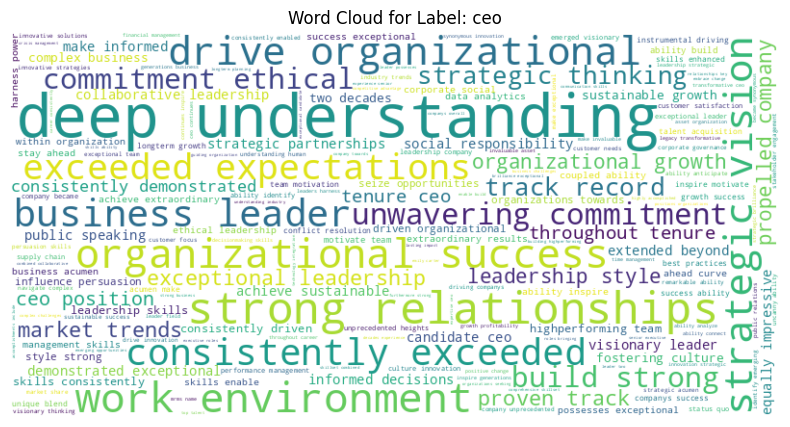

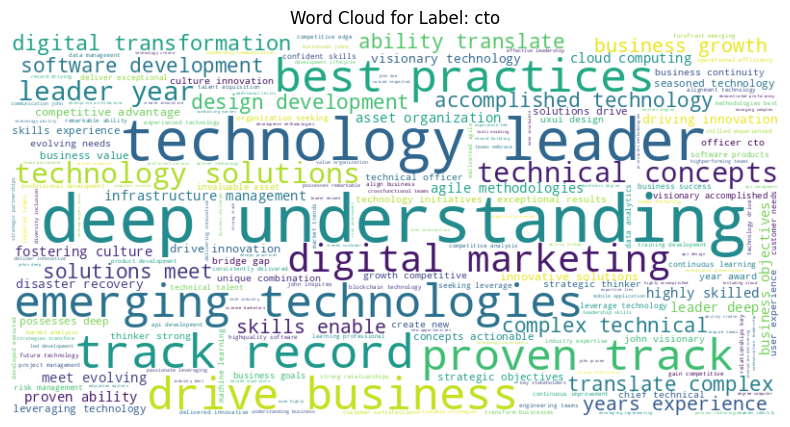

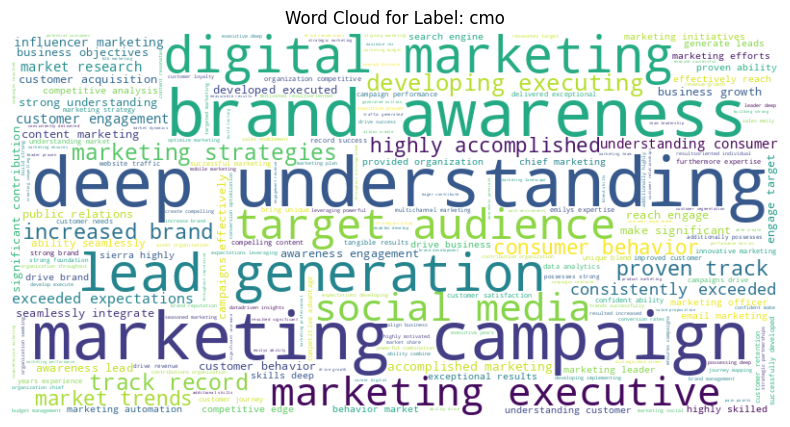

In [21]:
find_top_words_by_label(new_profiles)

In [29]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

encoded_dict = tokenizer.batch_encode_plus(new_profiles['Cleaned_Text'].tolist(), 
                                          add_special_tokens=True,
                                          max_length=256,
                                          padding=True,
                                          truncation=True,
                                          return_attention_mask=True,
                                          return_tensors='pt')

input_ids = encoded_dict['input_ids']
attention_masks = encoded_dict['attention_mask']

In [30]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

model.eval()

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_masks)

embeddings = outputs.last_hidden_state[:, 0, :].numpy() 

In [31]:
embeddings.shape

(1682, 768)

In [32]:
def calculate_distortion(data, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

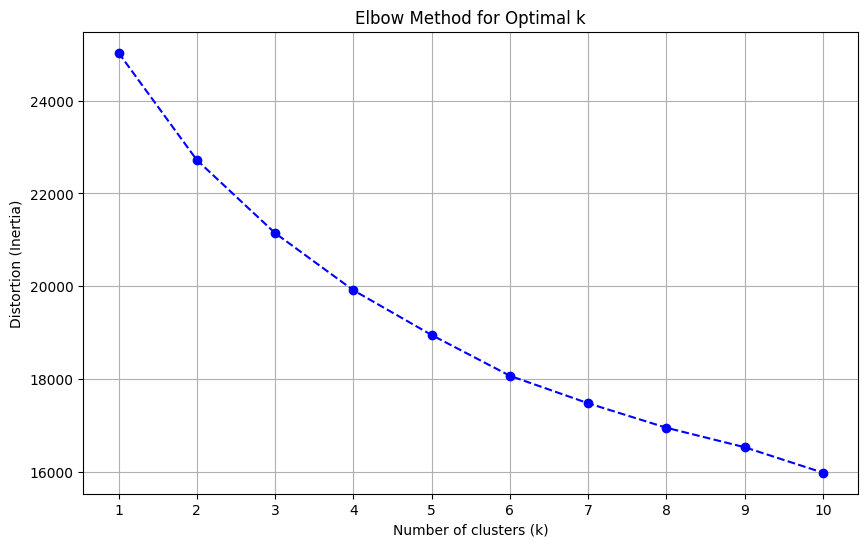

In [35]:
max_k = 10  # Maximum number of clusters to consider
distortions = calculate_distortion(embeddings, max_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), distortions, marker='o', linestyle='--', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

In [36]:
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(embeddings)
new_profiles['Cluster'] = clusters

new_profiles[['Cleaned_Text', 'Cluster']]

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cleaned_Text,Cluster
0,highstakes world business mr david chen ascend...,3
1,competitive realm business ms sophia patel eme...,3
2,everevolving landscape business ms sophia pate...,3
3,everchanging landscape business ms sophia pate...,3
4,everchanging landscape business mr david chen ...,3
...,...,...
1677,highly accomplished marketing executive proven...,0
1678,highly accomplished marketing executive proven...,0
1679,sierra highly accomplished marketing executive...,5
1680,highly accomplished marketing executive proven...,0
